# Housing Dataset Analysis

## Introduction
In this project we are going to perform a linear Regression analysis that's covering both inferential modeling and predictive modeling. At the end of the analysis we are going to provide a final report on all of our findings.

## Business Understanding
Our client is a real estate agency situated in King County, Washington that helps homewoners buy / or sell homes. They are looking to get a better understanding on what features about a house are the most important when trying to estimate a homes price in that area and they also what you to come up with a pricing algorithm that can help them to determine the pricing of future homes.

## Data Understanding

We have been provided access to data containing information on over 10,000 homes together with their respective attributes. The datasets are contained in the Data folder where:
 1. kc_house_data.csv contains data on the different homes together with their attributes
 2. column_names.md contains a breakdown on the Column Names and their descriptions for Kings County Data Set

## Load the Data
 
 In the cells below, load the relevant libraries and load the data

In [1]:
# load the imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_csv('Data/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
data['sqft_lot'].value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [4]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [5]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [6]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [7]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

## Data Cleaning

### Check the Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Based on the summary above, the columns are made up of 21 columns with 21597 entries. There are three columns with missing values(waterfront, view, yr_renovated). The column data types are mainly int64, float64, with  2 columns with the object data type.

On further investigation, i noticed the sqft_basement column is assigned the object datatype and its a numerical variable. Below i will assign a numerical datatype to the sqft_basement column

In [10]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
875.0         1
2250.0        1
2390.0        1
1281.0        1
2310.0        1
Name: sqft_basement, Length: 304, dtype: int64

Based on the summary above there is an entry(?) which on further investigation i discovered it represents the homes in which they aren't really sure is they have a basement or don't know if they have a basement.

Based on this, i will replace the '?' entry with 0 below.

In [11]:
data['sqft_basement'] = data['sqft_basement'].replace('?', '0')

In [12]:
data['sqft_basement'].value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
176.0         1
283.0         1
2310.0        1
1548.0        1
506.0         1
Name: sqft_basement, Length: 304, dtype: int64

From the output above, i have replaced '?' with 0.

Below i will assign the sqft_basement column with a numerical datatype

In [13]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the output above, i have successfully assigned a new data type to the sqft_basement column

Below, i create a copy of the original dataset in order not yo modify it then find the sum of the values of the sqft_basement column and the sqft_above column and investigate if the sum of the two will give the same values as the values contained in the sqft_living column.


In [15]:
data_1 = data.copy()

In [16]:
#  find the sum of the two columns
data_1['sum_columns'] = data_1['sqft_basement'] + data['sqft_above']
data_1['sum_columns']

0        1180.0
1        2570.0
2         770.0
3        1960.0
4        1680.0
          ...  
21592    1530.0
21593    2310.0
21594    1020.0
21595    1600.0
21596    1020.0
Name: sum_columns, Length: 21597, dtype: float64

In [17]:
data_1['sqft_living'] == data_1['sum_columns']

0        True
1        True
2        True
3        True
4        True
         ... 
21592    True
21593    True
21594    True
21595    True
21596    True
Length: 21597, dtype: bool

Based on the output above, it is evident that the values are the same. Therefore, i will drop the sqft_basement and sqft_above columns in order to reduce multicollinearity within the dataset and i will also drop the id, date, zipcode, longitude, latitude and view columns as they won't be used when carrying out the analysis.

In [18]:
data_1.drop(['id', 'date', 'sqft_basement', 'sqft_above', 'sum_columns', 'zipcode', 'long', 'lat', 'view'], axis=1, inplace=True)

In [19]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   17755 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


### Check for Null values.

In [20]:
data_1.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

As concluded above there are three columns with missing values, i will then drop the rows with missing values.


In [21]:
data_1 = data_1.dropna()

In [22]:
data_1.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15809 non-null  float64
 1   bedrooms       15809 non-null  int64  
 2   bathrooms      15809 non-null  float64
 3   sqft_living    15809 non-null  int64  
 4   sqft_lot       15809 non-null  int64  
 5   floors         15809 non-null  float64
 6   waterfront     15809 non-null  float64
 7   condition      15809 non-null  int64  
 8   grade          15809 non-null  int64  
 9   yr_built       15809 non-null  int64  
 10  yr_renovated   15809 non-null  float64
 11  sqft_living15  15809 non-null  int64  
 12  sqft_lot15     15809 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.7 MB


### Check For Multicollinearity

Multicollinearity describes the relationship between two predictors. In this case our predictors are every other attributes excluding the price which is our target variable. This affects a linear regression model because if two predictors are highly correlated with the target and also highly correlated with each other, it will be hard to distinguish the effects of one predictor variable on target and the other predictor variable on the target. 

This reduces the performance of a linear regression model. Therefore, it is important to check a for multicollinearity before performing the analysis.



The first step in doing this is checking the correlation coefficient between our attributes.

In [24]:
# Calculate the correlation coefficient
corr = data_1.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.306140,0.527289,0.706530,0.083997,0.258945,0.280618,0.034932,0.663696,0.049679,0.122590,0.581204,0.079027
bedrooms,0.306140,1.000000,0.512256,0.573750,0.025019,0.181034,-0.003797,0.020236,0.354690,0.153824,0.017530,0.391217,0.024844
bathrooms,0.527289,0.512256,1.000000,0.754361,0.079601,0.505306,0.068958,-0.129893,0.665321,0.504720,0.047328,0.570180,0.081324
sqft_living,0.706530,0.573750,0.754361,1.000000,0.164960,0.359629,0.114909,-0.061962,0.764699,0.314645,0.050515,0.756818,0.176336
sqft_lot,0.083997,0.025019,0.079601,0.164960,1.000000,-0.009642,0.025928,-0.016507,0.108489,0.051929,0.001981,0.144950,0.719935
floors,0.258945,0.181034,0.505306,0.359629,-0.009642,1.000000,0.018991,-0.261072,0.459757,0.487087,-0.000059,0.282849,-0.013395
waterfront,0.280618,-0.003797,0.068958,0.114909,0.025928,0.018991,1.000000,0.017035,0.085207,-0.023442,0.087244,0.092529,0.029692
condition,0.034932,0.020236,-0.129893,-0.061962,-0.016507,-0.261072,0.017035,1.000000,-0.147291,-0.366708,-0.060902,-0.096366,-0.005613
grade,0.663696,0.354690,0.665321,0.764699,0.108489,0.459757,0.085207,-0.147291,1.000000,0.443247,0.012386,0.717371,0.116185
yr_built,0.049679,0.153824,0.504720,0.314645,0.051929,0.487087,-0.023442,-0.366708,0.443247,1.000000,-0.223718,0.322668,0.070717


Below i will plot a heatmap to give us a visual summary of the correlation coefficient between the attributes.

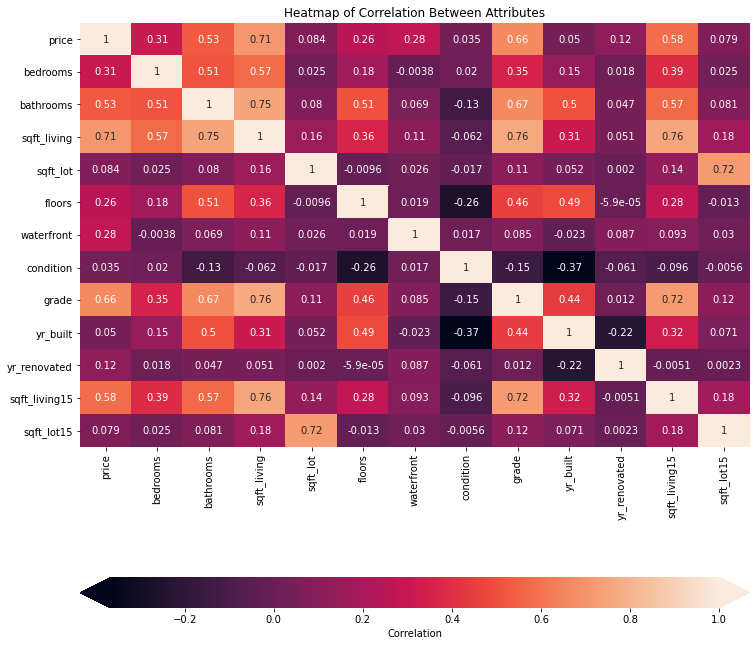

In [25]:

figure , ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    data=corr,
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes");

From the above visual summary showing us the correlation matrix, we can tell that there is a high correlation between some predictors like (sqft_living and sqft_above), (sqft_living and bathrooms), (sqft_living and grade) etc..

Below, we will find the measure of multicollinearity in the attributes using the correlation matrix and find pairs of predictors variables with the highest multicollinearity

Below, i will create the target variable containing our dependent variable which is the price and the predictors variable containing our independent variables

In [26]:
target = data_1['price']
predictors = data_1.drop(['price'], axis=1)

In [27]:
# Fiding the correlation coefficient of the predictor variables
pred_corr = predictors.corr()
pred_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.512256,0.573750,0.025019,0.181034,-0.003797,0.020236,0.354690,0.153824,0.017530,0.391217,0.024844
bathrooms,0.512256,1.000000,0.754361,0.079601,0.505306,0.068958,-0.129893,0.665321,0.504720,0.047328,0.570180,0.081324
sqft_living,0.573750,0.754361,1.000000,0.164960,0.359629,0.114909,-0.061962,0.764699,0.314645,0.050515,0.756818,0.176336
sqft_lot,0.025019,0.079601,0.164960,1.000000,-0.009642,0.025928,-0.016507,0.108489,0.051929,0.001981,0.144950,0.719935
floors,0.181034,0.505306,0.359629,-0.009642,1.000000,0.018991,-0.261072,0.459757,0.487087,-0.000059,0.282849,-0.013395
waterfront,-0.003797,0.068958,0.114909,0.025928,0.018991,1.000000,0.017035,0.085207,-0.023442,0.087244,0.092529,0.029692
condition,0.020236,-0.129893,-0.061962,-0.016507,-0.261072,0.017035,1.000000,-0.147291,-0.366708,-0.060902,-0.096366,-0.005613
grade,0.354690,0.665321,0.764699,0.108489,0.459757,0.085207,-0.147291,1.000000,0.443247,0.012386,0.717371,0.116185
yr_built,0.153824,0.504720,0.314645,0.051929,0.487087,-0.023442,-0.366708,0.443247,1.000000,-0.223718,0.322668,0.070717
yr_renovated,0.017530,0.047328,0.050515,0.001981,-0.000059,0.087244,-0.060902,0.012386,-0.223718,1.000000,-0.005146,0.002324


In [28]:
df=pred_corr.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [29]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living15, sqft_living)",0.934326
"(sqft_lot15, sqft_lot)",0.930773
"(grade, sqft_living)",0.926460
"(sqft_living15, grade)",0.917273
"(sqft_living, bathrooms)",0.908608
"(bathrooms, grade)",0.897219
"(bathrooms, sqft_living15)",0.814023
"(yr_built, floors)",0.784625


Above, we got the pairs of data with high multicollinearity with each other.

In [30]:
predictors.drop([ 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)


In [31]:
predictors

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
1,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
3,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0
5,4,4.50,5420,101930,1.0,0.0,3,11,2001,0.0
6,3,2.25,1715,6819,2.0,0.0,3,7,1995,0.0
...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,2.0,0.0,3,8,2008,0.0
21592,3,2.50,1530,1131,3.0,0.0,3,8,2009,0.0
21593,4,2.50,2310,5813,2.0,0.0,3,8,2014,0.0
21594,2,0.75,1020,1350,2.0,0.0,3,7,2009,0.0


In [32]:
df2=predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [33]:
df2[(df2.cc>.75) & (df2.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.764699
"(bathrooms, sqft_living)",0.754361


Based on the output above, there still is some come multicollinearity present within the predictor variable. The variables whosing the multicollinearity are important features within our model and hence i choose to ignore the multicollinearity as they are needed in our analysis.

## Exploring the Data

The next step in our analysis is doing exploratory analysis on the data. In this step of our analysis i will be using the data_1 dataset that we created as a copy of our original data and we are going to drop the same columns as we did above.

In [34]:
data_1.drop([ 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [35]:
data_1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,0.0
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,2008,0.0
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,0.0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,0.0


### Distribution of the Price

Below, i will plot a histogram to check if our prices are normally distibuted.

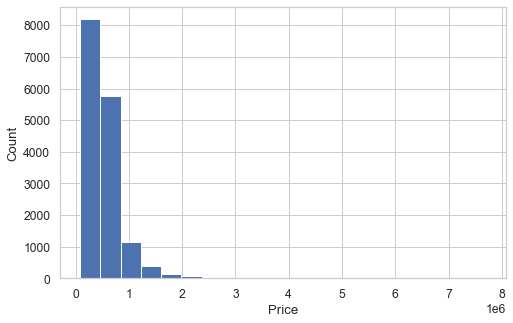

In [36]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data_1['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Price', ylabel='Count', );

Based on our plot above, we see that our prices are skewed to the right. Therefore we need to normalize our data.

Below, i will use log transformation in normalizing our prices

In [37]:
data_1['price'] = data_1['price'].map(lambda x: np.log(x))

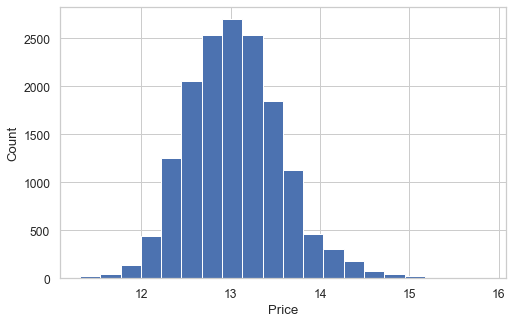

In [38]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data_1['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Price', ylabel='Count', );

Based on the plot above, we have been able to normalize our prices.

### Distribution Of Numerical Variables

It is evident that in our data we have both numerical and categorical variable. Therefore, we need to identify the numericl and categorical variables in our data and the check whether our numerical variable are normalized, if not we need to use log tarnsformation to normalize the variables.

#### Checking For Numerical and Categorical Variables

Below, i will plot histograms showing the distribution of our attributes. This will help us identifying numerical and categorical variables. I will use the predictors variable which only contains data on the independent/predictor variables.

In [39]:
predictors

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
1,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
3,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0
5,4,4.50,5420,101930,1.0,0.0,3,11,2001,0.0
6,3,2.25,1715,6819,2.0,0.0,3,7,1995,0.0
...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,2.0,0.0,3,8,2008,0.0
21592,3,2.50,1530,1131,3.0,0.0,3,8,2009,0.0
21593,4,2.50,2310,5813,2.0,0.0,3,8,2014,0.0
21594,2,0.75,1020,1350,2.0,0.0,3,7,2009,0.0


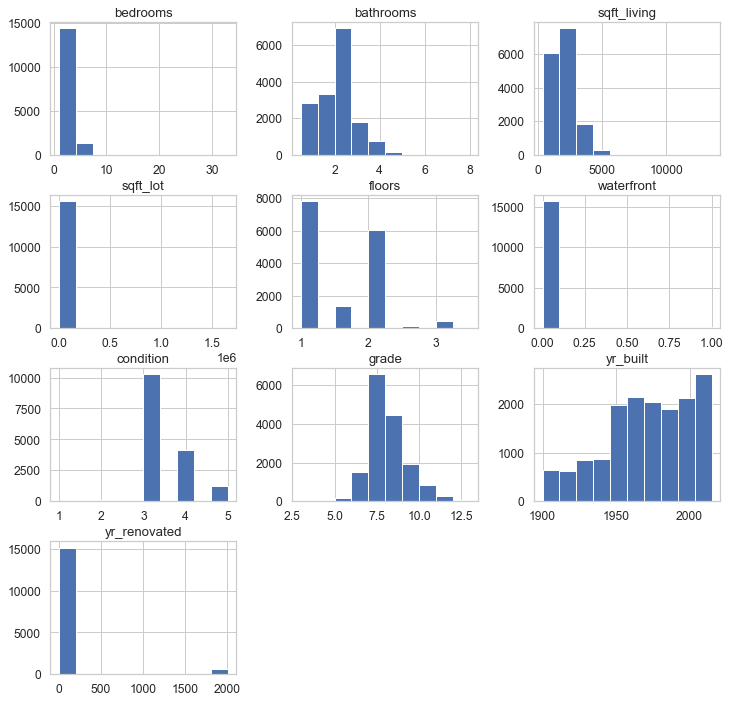

In [40]:

fig = plt.figure(figsize = (12,12))
ax = fig.gca()
predictors.hist(ax = ax);

From the above output we are able to distinguish between the categorical and numerical variable. Below i will create two variable containing the categorical and numerical variables.

In [41]:
num_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [42]:
cat_features = ['waterfront', 'condition', 'yr_renovated', 'grade',]

Below i will normalize the numerical variables as most of them are either skewed to the right or left but i will exclude the as its data points seem to be normalized. 

In [43]:
for features in num_features:
    data_1[features] = data_1[features].map(lambda x: np.log(x))

Below i will plot a hsitogram to check if the numerical variables have been normalized.

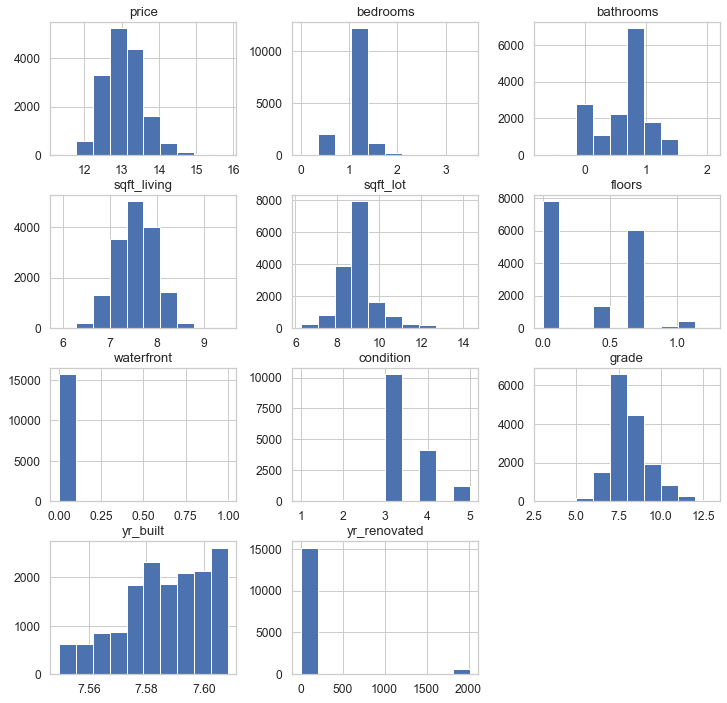

In [44]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data_1.hist(ax = ax);

In [45]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15809 non-null  float64
 1   bedrooms      15809 non-null  float64
 2   bathrooms     15809 non-null  float64
 3   sqft_living   15809 non-null  float64
 4   sqft_lot      15809 non-null  float64
 5   floors        15809 non-null  float64
 6   waterfront    15809 non-null  float64
 7   condition     15809 non-null  int64  
 8   grade         15809 non-null  int64  
 9   yr_built      15809 non-null  float64
 10  yr_renovated  15809 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.4 MB




Based on the plots shown we have successfully normalized our numerical variables. Next we will work on our categorical variables.

### Dealing With Categorical Variables

First we'll need to change the datatypes of our categorical from numerical to categorical. The yr_renovated column is also categorical based on my investigation as a home is either renovated ot not renovated. Therefore i will create a new column based on the yr_renovation where  will represent homes that are not renovated and 1 will represent homes renovated in a specific year then drop the yr_renovation column.

In [46]:
data_1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,0.0,3,7,7.576097,1991.0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,0.0,5,7,7.583248,0.0
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,0.0,3,8,7.594381,0.0
5,14.022525,1.386294,1.504077,8.597851,11.532042,0.000000,0.0,3,11,7.601402,0.0
6,12.458775,1.098612,0.810930,7.447168,8.827468,0.693147,0.0,3,7,7.598399,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,1.098612,0.916291,7.177782,7.165493,0.693147,0.0,3,8,7.604894,0.0
21592,12.793859,1.098612,0.916291,7.333023,7.030857,1.098612,0.0,3,8,7.605392,0.0
21593,12.899220,1.386294,0.916291,7.745003,8.667852,0.693147,0.0,3,8,7.607878,0.0
21594,12.904459,0.693147,-0.287682,6.927558,7.207860,0.693147,0.0,3,7,7.605392,0.0


In [47]:
data_1['yr_renovated'].value_counts()

0.0       15157
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1974.0        1
1959.0        1
1934.0        1
1944.0        1
1976.0        1
Name: yr_renovated, Length: 70, dtype: int64

Below, i will create a new column 'renovated_homes' based off on the 'yr_renovated' column

In [48]:
data_1['renovated_homes'] = data_1['yr_renovated']

Next i will proceed to replace all the rows who has a value greater than 0 with 1.

In [49]:
data_1["renovated_homes"] = np.where(data_1["renovated_homes"] > 0.0, 1, 0)

In [50]:
data_1["renovated_homes"].value_counts()

0    15157
1      652
Name: renovated_homes, dtype: int64

Based on the output above i have two values in my renovated_homes columns where 0 represents a home that has not been renovated and 1 represents a renovated home.

In [51]:
# Drop the yr_renovated column
data_1.drop(['yr_renovated'], axis=1, inplace=True)

In [52]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            15809 non-null  float64
 1   bedrooms         15809 non-null  float64
 2   bathrooms        15809 non-null  float64
 3   sqft_living      15809 non-null  float64
 4   sqft_lot         15809 non-null  float64
 5   floors           15809 non-null  float64
 6   waterfront       15809 non-null  float64
 7   condition        15809 non-null  int64  
 8   grade            15809 non-null  int64  
 9   yr_built         15809 non-null  float64
 10  renovated_homes  15809 non-null  int32  
dtypes: float64(8), int32(1), int64(2)
memory usage: 1.4 MB


Next i will assign a new data type('categorical') to our categorical variables in the data. I will use the cat_features variavle to do this

In [53]:
cat_features = ['waterfront', 'condition', 'renovated_homes', 'grade']

In [54]:
for features in cat_features:
    data_1[features] = data_1[features].astype('category')

In [55]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15809 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   price            15809 non-null  float64 
 1   bedrooms         15809 non-null  float64 
 2   bathrooms        15809 non-null  float64 
 3   sqft_living      15809 non-null  float64 
 4   sqft_lot         15809 non-null  float64 
 5   floors           15809 non-null  float64 
 6   waterfront       15809 non-null  category
 7   condition        15809 non-null  category
 8   grade            15809 non-null  category
 9   yr_built         15809 non-null  float64 
 10  renovated_homes  15809 non-null  category
dtypes: category(4), float64(7)
memory usage: 1.0 MB


Based on the summary above, i have successfully assigned a new data type to the categorical variables. Next we need to perform one hot encoding on our data to make it possible for us to use the categorical data in our model.

In [56]:
cat_features = ['waterfront', 'condition', 'renovated_homes', 'grade']

In [57]:
for features in cat_features:
    feat_dummy = pd.get_dummies(data_1[features], prefix=features ,drop_first=True)
    data_1 = data_1.drop(features, axis=1)
    data_1 = pd.concat([data_1, feat_dummy], axis=1)


In [58]:
# check the first five rows of the data
data_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,7.576097,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,7.583248,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,7.594381,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,14.022525,1.386294,1.504077,8.597851,11.532042,0.000000,7.601402,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,12.458775,1.098612,0.810930,7.447168,8.827468,0.693147,7.598399,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In the code cell above, i used the pd.get_dummies library to perform the one hot encoding our data. I passed the drop_first=True so as to avoid the dummy variable trap.

## Modeling The Data

Below we are going to build our linear regression model based on the preprocessed data above. We are going to split our data first into the train set and the test set using the scikit learn inbuilt function.

In [59]:
# load the data
data_1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,7.576097,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,7.583248,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,7.594381,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,14.022525,1.386294,1.504077,8.597851,11.532042,0.000000,7.601402,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,12.458775,1.098612,0.810930,7.447168,8.827468,0.693147,7.598399,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,1.098612,0.916291,7.177782,7.165493,0.693147,7.604894,0,0,1,...,0,0,0,0,1,0,0,0,0,0
21592,12.793859,1.098612,0.916291,7.333023,7.030857,1.098612,7.605392,0,0,1,...,0,0,0,0,1,0,0,0,0,0
21593,12.899220,1.386294,0.916291,7.745003,8.667852,0.693147,7.607878,0,0,1,...,0,0,0,0,1,0,0,0,0,0
21594,12.904459,0.693147,-0.287682,6.927558,7.207860,0.693147,7.605392,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [60]:
train, test = train, test = train_test_split(data_1)

In [61]:
# check the first 5 rows of train data
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
7889,12.206073,1.386294,0.000000,7.207860,9.350711,0.000000,7.583756,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4522,13.604790,1.098612,0.405465,7.326466,9.109525,0.000000,7.577634,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8390,13.071070,1.098612,0.810930,7.506592,8.988196,0.000000,7.591357,0,0,1,...,0,0,0,0,1,0,0,0,0,0
18266,13.527828,1.098612,0.000000,7.021084,9.053570,0.000000,7.576610,0,0,1,...,0,0,0,1,0,0,0,0,0,0
18558,13.551545,1.098612,0.916291,7.886081,9.299084,0.693147,7.594884,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [62]:
# check the first 5 rows of test data
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_1.0,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
16376,12.619175,1.609438,1.011601,8.048788,9.153770,0.0,7.587311,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10438,13.384728,1.098612,0.559616,7.517521,7.745003,0.0,7.556951,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8266,13.211290,1.098612,0.916291,7.251345,7.891705,0.0,7.593374,0,0,1,...,0,0,0,1,0,0,0,0,0,0
11296,13.012549,1.386294,0.916291,7.709757,8.517193,0.0,7.603898,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,12.343658,1.098612,0.000000,7.484369,8.918650,0.0,7.580700,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [63]:
print(len(train), len(test))

11856 3953


Below, i will find the correlation between 'price' which is our target variable and the predictor variables in our train dataset.

In [64]:
target_corr =  train.corr()['price'].map(abs).sort_values(ascending=False)
target_corr

price                1.000000
sqft_living          0.676339
bathrooms            0.518987
grade_10             0.341938
bedrooms             0.341807
grade_7              0.338547
floors               0.328900
grade_6              0.313728
grade_9              0.309960
grade_11             0.272874
waterfront_1.0       0.186012
grade_12             0.181758
grade_5              0.146008
sqft_lot             0.135549
renovated_homes_1    0.119092
grade_8              0.107057
grade_13             0.100504
yr_built             0.078823
condition_2          0.073759
condition_5          0.059807
grade_4              0.051756
condition_4          0.044994
condition_3          0.023225
Name: price, dtype: float64

Based on the output above, the sqft_living has the highest correlation coefficient with the price.

Next i will plot a scatter plot showing the relationship between the price and the sqft_living, this will give us a visual summary of what i have concluded above

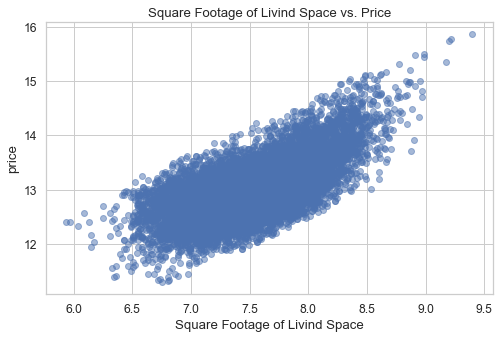

In [65]:
x = train['sqft_living']
y = train['price']

fig, ax = plt.subplots()

ax.scatter(x, y, alpha=0.5)
ax.set_xlabel('Square Footage of Livind Space')
ax.set_ylabel('price')
ax.set_title("Square Footage of Livind Space vs. Price");

The plot shows that the two variables share a positive correlation

### Building The Baseline Model

I will proceed to build a linear regression model based on the two variables(price, sqft_living), where price is our predictor variable and sqft_living is the target/outcome.

In [66]:
SqftLiving = train['sqft_living']
Price = train['price']

formula = "Price ~ SqftLiving"
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     9994.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:57:07   Log-Likelihood:                -5575.8
No. Observations:               11856   AIC:                         1.116e+04
Df Residuals:                   11854   BIC:                         1.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7040      0.064    105.533      0.000       6.579       6.829
SqftLiving     0.8394      0.008     99.970      0.000       0.823       0.856
==============================================================================
Omnibus:                       72.919   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.104
Skew:                           0.147   Prob(JB):                     2.68e-15
Kurtosis:                       2.779   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the output above , the model gives us a r-squared value of 0.451 this shows that about 45.1% variation in the price is explained by 

In [71]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression


splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=LinearRegression(),
    X=x,
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      nan
Validation score: nan


In [68]:
top_5 = ['sqft_living', 'bathrooms', 'bedrooms', 'grade_10', 'grade_7'] 
X = train[top_5]
Y = train['price']

formula = "Y ~ X"
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     2320.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:09:17   Log-Likelihood:                -5185.2
No. Observations:               11856   AIC:                         1.038e+04
Df Residuals:                   11850   BIC:                         1.043e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0736      0.098     72.105      0.000       6.881       7.266
X[0]           0.8292      0.015     56.494      0.000       0.800       0.858
X[1]           0.0380      0.014      2.783      0.005       0.011       0.065
X[2]          -0.2351      0.016    -14.480      0.000      -0.267      -0.203
X[3]           0.2525      0.016     15.320      0.000       0.220       0.285
X[4]          -0.1173      0.008    -15.564      0.000      -0.132      -0.102
==============================================================================
Omnibus:                       40.561   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.836
Skew:                           0.127   Prob(JB):                     2.24e-09
Kurtosis:                       2.873   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

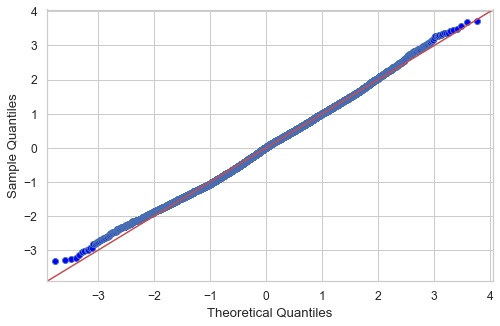

In [69]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [70]:
predictor = train.drop('price', axis=1)

In [71]:
plt.scatter(model.predict(train[predictor]), model.resid)
plt.plot(model.predict(train[predictor]), [0 for i in range(len(train))])

ValueError: Boolean array expected for the condition, not float64